In [1]:
import sys
import operator
import requests
import json
import twitter
import datetime
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
%matplotlib inline
from sqlalchemy import create_engine
my_conn = create_engine("mysql+pymysql://root:""@localhost:3306/test")

In [2]:
import tweepy
import time
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
consumer_key = 'Your api Key'
consumer_secret = 'Your Consumer Secaret'
access_token = 'your access token'
access_secret = 'your  secret'
bearer_token = 'your bearer token'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
num_tweets = 100
tweets = []
likes = []
time = []
retweets = []

In [6]:
for t in tweepy.Cursor (api.search_tweets,
                        q= "Mcdonalds hate-filter:retweets",
                        result_type = ['popular'],
                        lang = 'en',
                        #until = next_day.date(),
                        tweet_mode='extended').items(num_tweets):
    tweets.append(t.full_text)
    likes.append(t.favorite_count)
    time.append(t.created_at)
    retweets.append(t.retweet_count)
    #vs = analyzer.polarity_scores(tweets)
    #scores.append(vs)
    #print("{:-<65} {}".format(tweet, str(vs)))

In [7]:
df = pd.DataFrame({'tweets':tweets, 'likes':likes,'retweets':retweets, 'time':time})

In [8]:
df.sort_values("likes",ascending=False)

,tweets,likes,retweets,time
89,I hate McDonalds to death (gross af food) but ...,37,3,2022-04-27 19:19:03+00:00
44,"modernity was invented in 2001, when mcdonalds...",16,3,2022-04-28 14:32:51+00:00
29,i hate when bitches act like they dont eat mcd...,10,2,2022-04-28 20:44:45+00:00
24,In your lifetime how many times has McDonalds ...,7,1,2022-04-28 22:32:59+00:00
85,@Gifted88 @WatcherGuru @elonmusk Hate to break...,7,0,2022-04-27 20:58:08+00:00
...,...,...,...,...
62,ISHIDA: CAN WE GO GET MCDONALDS\nMONDO: NO ISH...,0,0,2022-04-28 03:36:42+00:00
63,Why does @McDonalds hate me and show it by mes...,0,0,2022-04-28 03:31:55+00:00
18,nah there was literatly just a STRAW in my fuc...,0,0,2022-04-29 02:08:32+00:00
65,@BubbaWallace @McDonalds @23XIRacing Good ole ...,0,0,2022-04-28 03:06:14+00:00


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores = []
for tweet in tweets:
    vs = analyzer.polarity_scores(tweet)
    scores.append(vs)
    print("{:-<65} {}".format(tweet, str(vs)))
    if vs['compound'] >= 0.05 :
        print("Positive".format(tweet,str(vs)))
    elif vs['compound'] <= - 0.05 :
        print("Negative".format(tweet,str(vs)))
    else :
        print("Neutral".format(tweet,str(vs)))

i hate living in a small ass town 😭 why is mcdonalds delivery closed at 9:30pm {'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'compound': -0.8834}
Negative
gonna have to throw food away tonight 👎 i hate wasting food but im fasting and my grandpa is buying my mcdonalds after school so i will have to yhrow it away {'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'compound': -0.4939}
Negative
@7shegussy I saw it 2 hours later and i was 40 min away. Fucken hate @McDonalds  right now. This was the second time in two weeks getting fucked by them {'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.8442}
Negative
Why is there a whole segment of the news decicated to upsellig mcdonalds.... everyday....

I fucking hate what the world has become... {'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.6115}
Negative
I have a mcdonalds coffee this morning maybe god doesn't hate me- {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.6246}
Positive
@nabijpg we hate to disappoint, Hera! tell us here what w

In [11]:
data = pd.DataFrame(scores)
final_dataset= pd.concat([df,data], axis=1)

In [16]:
#if it is positve negative or neutral
final_dataset['sentiment'] = ' '

for x in range(100):
    if final_dataset.iloc[x,7] < 0:
        final_dataset.iloc[x,8] = 'negative'
    elif final_dataset.iloc[x,7] > 0:
        final_dataset.iloc[x,8] = 'positve'
    else:
        final_dataset.iloc[x,8] = 'neutral'
        
Z=final_dataset.sort_values("likes",ascending=False)

In [17]:
Z=final_dataset.sort_values("likes",ascending=False)

In [19]:
Z.reset_index(inplace=True)

In [20]:
Z

,index,tweets,likes,retweets,time,neg,neu,pos,compound,sentiment
0,89,I hate McDonalds to death (gross af food) but ...,37,3,2022-04-27 19:19:03+00:00,0.471,0.529,0.000,-0.9343,negative
1,44,"modernity was invented in 2001, when mcdonalds...",16,3,2022-04-28 14:32:51+00:00,0.213,0.646,0.141,-0.2263,negative
2,29,i hate when bitches act like they dont eat mcd...,10,2,2022-04-28 20:44:45+00:00,0.420,0.442,0.138,-0.7269,negative
3,24,In your lifetime how many times has McDonalds ...,7,1,2022-04-28 22:32:59+00:00,0.206,0.794,0.000,-0.9034,negative
4,85,@Gifted88 @WatcherGuru @elonmusk Hate to break...,7,0,2022-04-27 20:58:08+00:00,0.121,0.879,0.000,-0.3291,negative
...,...,...,...,...,...,...,...,...,...,...
95,62,ISHIDA: CAN WE GO GET MCDONALDS\nMONDO: NO ISH...,0,0,2022-04-28 03:36:42+00:00,0.247,0.665,0.089,-0.6124,negative
96,63,Why does @McDonalds hate me and show it by mes...,0,0,2022-04-28 03:31:55+00:00,0.146,0.755,0.099,-0.2023,negative
97,18,nah there was literatly just a STRAW in my fuc...,0,0,2022-04-29 02:08:32+00:00,0.449,0.551,0.000,-0.9282,negative
98,65,@BubbaWallace @McDonalds @23XIRacing Good ole ...,0,0,2022-04-28 03:06:14+00:00,0.351,0.416,0.234,-0.6705,negative


In [39]:
Z.to_sql(con=my_conn,name='mcdonalds',if_exists='replace',index=False)

In [21]:
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))

additional_stopwords = ['things', 'stuff', 'sure', 'make', 'think','mcdonalds','mcdonald','hate',"https","co","@"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaisakh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
for w in additional_stopwords:

  stop_words.add(w)

import gensim

from gensim.utils import simple_preprocess

In [23]:
word_counts = dict()

for tweet in final_dataset[["tweets", "compound"]].values:

  for token in simple_preprocess(tweet[0]):

    if token not in stop_words:

      if token not in word_counts:

        word_counts[token] = [1, [tweet[1]]]

      else:

        word_counts[token][0] += 1

        word_counts[token][1].append(tweet[1])

In [24]:
for k, v in word_counts.items():

  word_counts[k][1] = np.mean(v[1])

In [25]:
sentiment_df = pd.DataFrame.from_dict(word_counts).transpose().rename({0:'Count', 1:'Sentiment'}, axis=1)

In [26]:
sentiment_df.reset_index(inplace=True)

In [27]:
sentiment_df.rename({'index':'Topic'},axis=1, inplace=True)

In [28]:
Y=sentiment_df.sort_values("Count",ascending=False)

In [29]:
Y

,Topic,Count,Sentiment
9,food,14.0,-0.282807
207,like,13.0,-0.165769
58,get,12.0,-0.736000
38,fucking,12.0,-0.359775
49,us,11.0,-0.663636
...,...,...,...
286,thursdayvibes,1.0,-0.571900
285,eating,1.0,-0.571900
284,fjtvhaoffq,1.0,-0.542300
283,proposing,1.0,-0.542300


In [32]:
X=Y.head(10).sort_values("Count",ascending=False).reset_index(drop=True)

In [33]:
X

,Topic,Count,Sentiment
0,food,14.0,-0.282807
1,like,13.0,-0.165769
2,get,12.0,-0.736000
3,fucking,12.0,-0.359775
4,us,11.0,-0.663636
5,white,8.0,-0.380337
6,go,8.0,-0.290762
7,home,7.0,-0.224314
8,family,6.0,-0.286883
9,got,6.0,-0.641383


In [35]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,20)

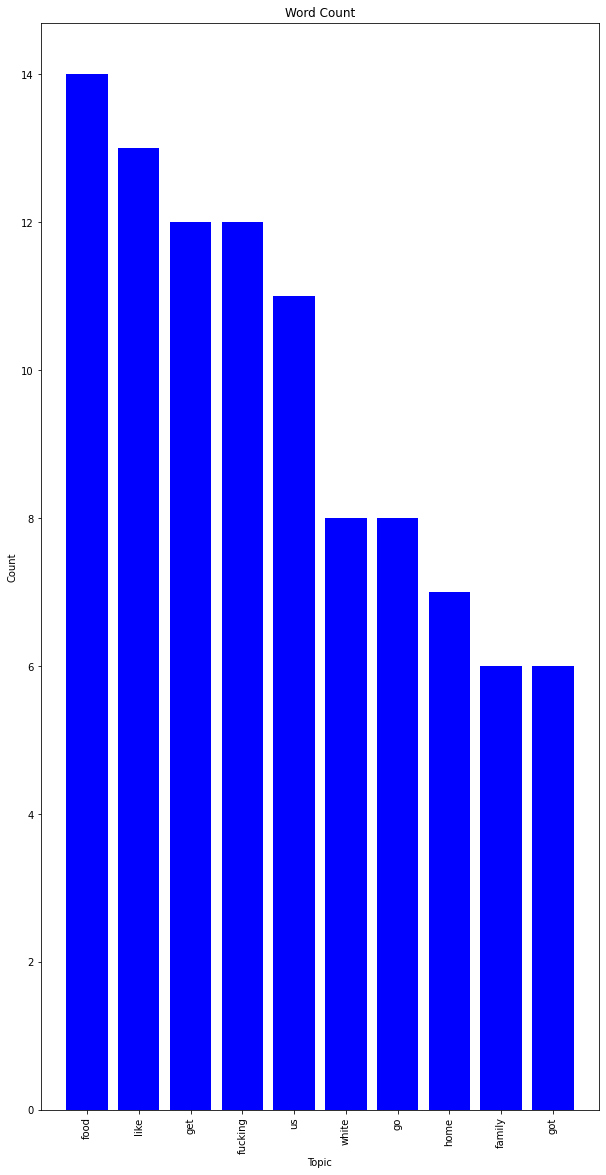

In [36]:
plt.bar("Topic", "Count", data =X, color = "blue")
plt.xlabel("Topic")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Word Count")
plt.show()

Negative


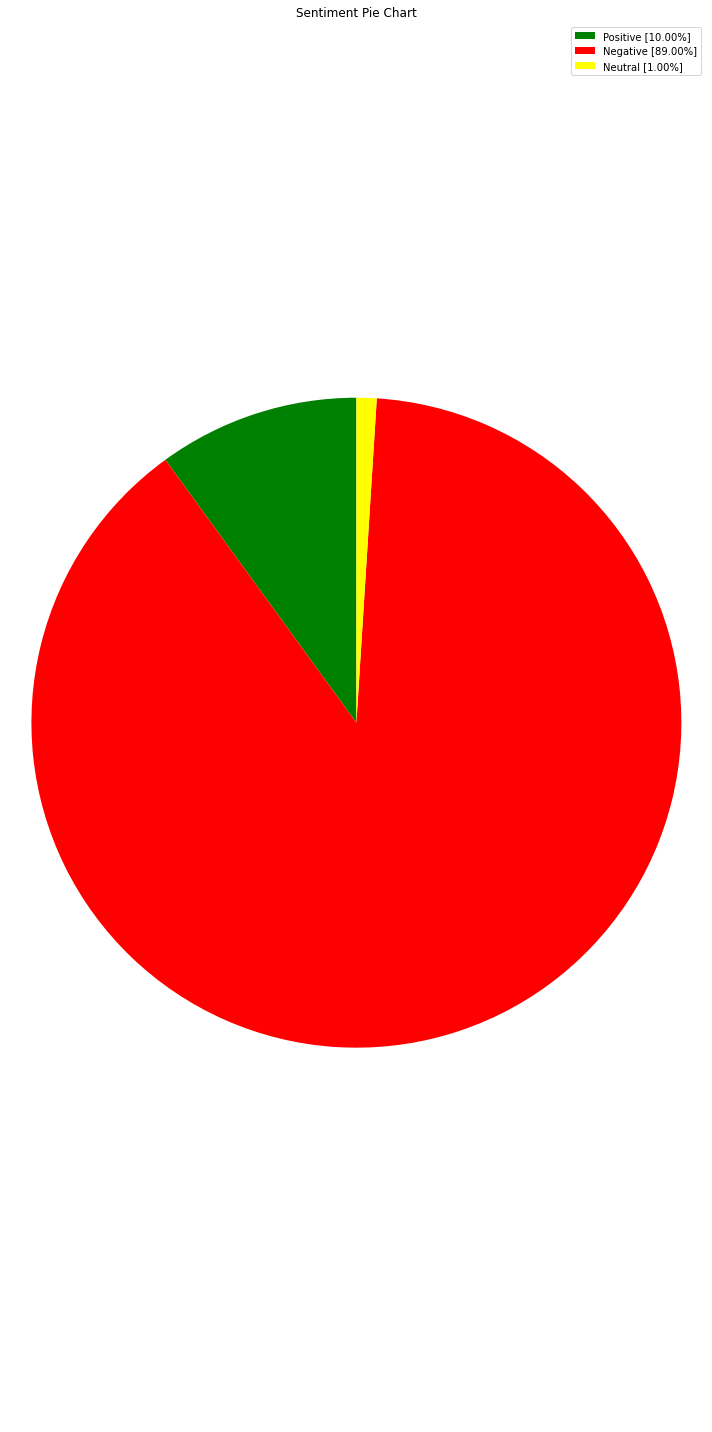

In [37]:
from textblob import TextBlob
import matplotlib.pyplot as plt

def percentage(part,whole):
    return 100*float(part)/float(whole)


positive = 0
negative = 0
neutral = 0
polarity = 0


for tweet in tweets:
    analyzer = TextBlob(tweet)
    polarity += analyzer.sentiment.polarity
    if analyzer.sentiment.polarity > 0:
        positive += 1
    elif analyzer.sentiment.polarity < 0:
        negative += 1
    elif analyzer.sentiment.polarity == 0:
        neutral += 1
positive = percentage(positive,(positive + negative + neutral))
negative = percentage(negative,(positive + negative + neutral))
neutral = percentage(neutral,(positive + negative + neutral))

positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')

if (polarity > 0):
    print("Positive")
elif (polarity < 0):
    print("Negative")
elif (polarity == 0):
    print("Neutral")

labels = ['Positive ['+str(positive)+'%]', 'Negative ['+str(negative)+'%]', 
'Neutral ['+str(neutral)+'%]']
sizes = [positive, negative, neutral]
colors = ['green','red','yellow']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Sentiment Pie Chart")
plt.axis('equal')
plt.tight_layout()
plt.show()